#**Gold Price Prediction**

## Submitted By:


Name: Rizvee Rifat Chowdhury      
ID: 19101502   







# Data Description
This data file has 2290 rows and 7 columns and is formatted as a Comma Separated Value file. It has five columns with numerical datatypes and one column with a date format. The data clearly displays the values of the variables SPX, GLD, USD, USO, and SLV in relation to the dates in the date column.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#create data drame to read data set
df = pd.read_csv('/content/Copy of gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


##**Explotary Data Analysis**
###1. Finding Unwanted Columns   
* Take-away: We wont consider Date feature so we will drop this feature in feature engineering section   
   
      
###2. Finding Missing Values

In [ ]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing values found")

No missing values found


#### **Take-away**:
* No missing values found

###3. Finding features with one value

In [ ]:
for column in df.columns:
  print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


#### **Take-away**   
* No features with one value

###4.Finding number of catagorical features

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['GLD']))]
categorical_features

['Date']

In [ ]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of categories are 2290


#### Take-away
* 'Date' is the only 1 categorical feature

###5.Finding categorical feature distribuition
* Take-away: none

###6. Analyzing relationship between Categorical Features and Label
* Take-away: none

### 7. Exploring the numerical features



In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['GLD']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


#### Take-away
* 4 numerical features found

### 8. Finding Discrete Numerical Features

In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


#### Take-away
* no discrete variable in dataset

### 9. Analyzing relation between discrete numerical features and labels
* none

### 10. Finding continous numerical features


In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['GOD']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


#### Take-away
* 4 continuous numerical features found

###11. Distribuition of continuous numerical features

<ipython-input-13-15cdf9fee607>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-13-15cdf9fee607>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-13-15cdf9fee607>:5: UserWarning: 

`distplot` is a deprecated function 

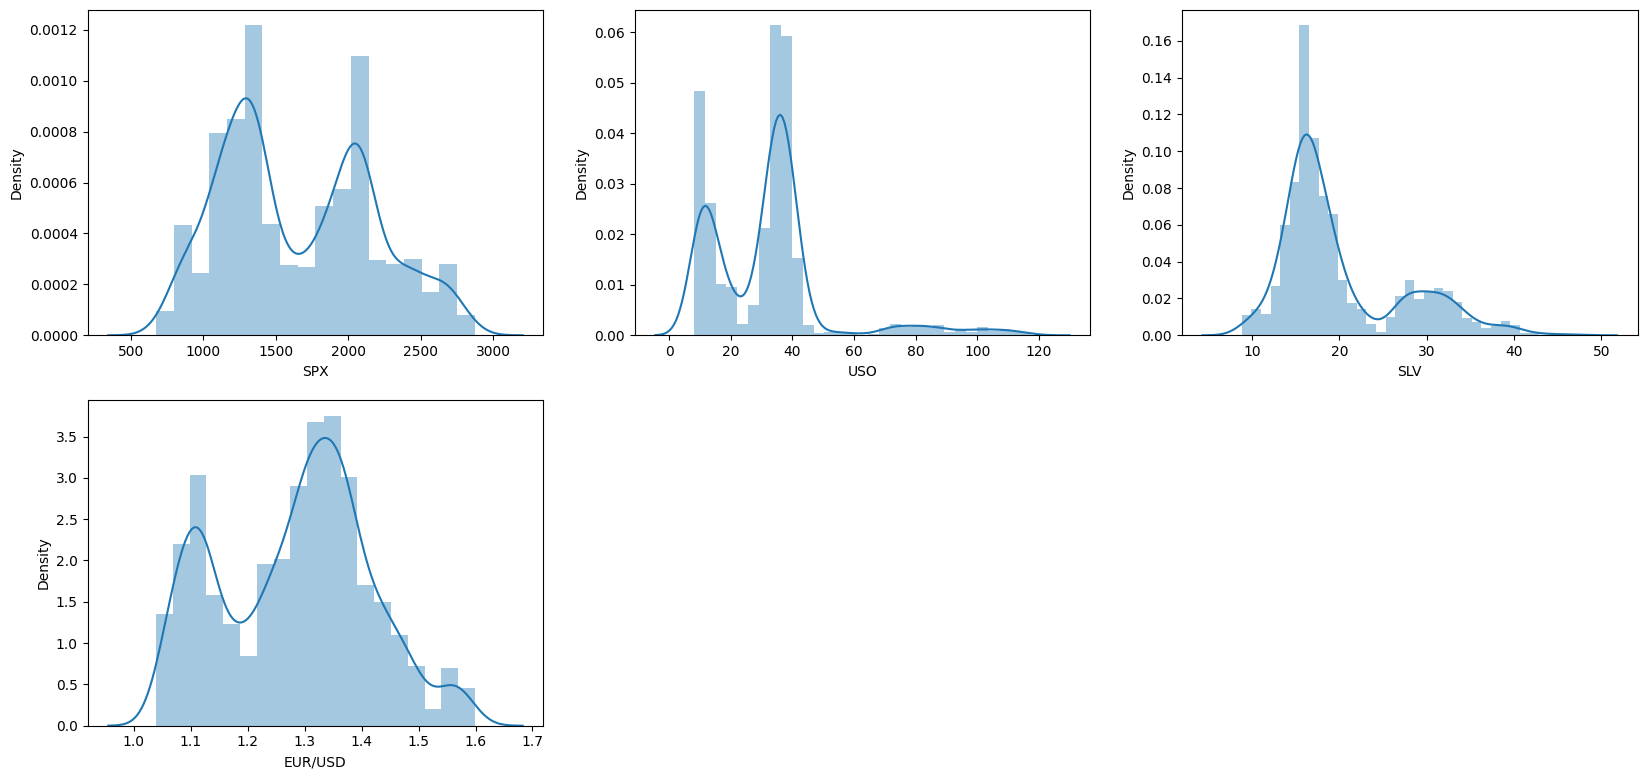

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

####Take-away:
*   SPX,SLV and EUR/USD distributed normally
*   USO heavely skewed towards right and seems to be have some outliers.



###12. Analyzing relation between continuous numerical features and labels

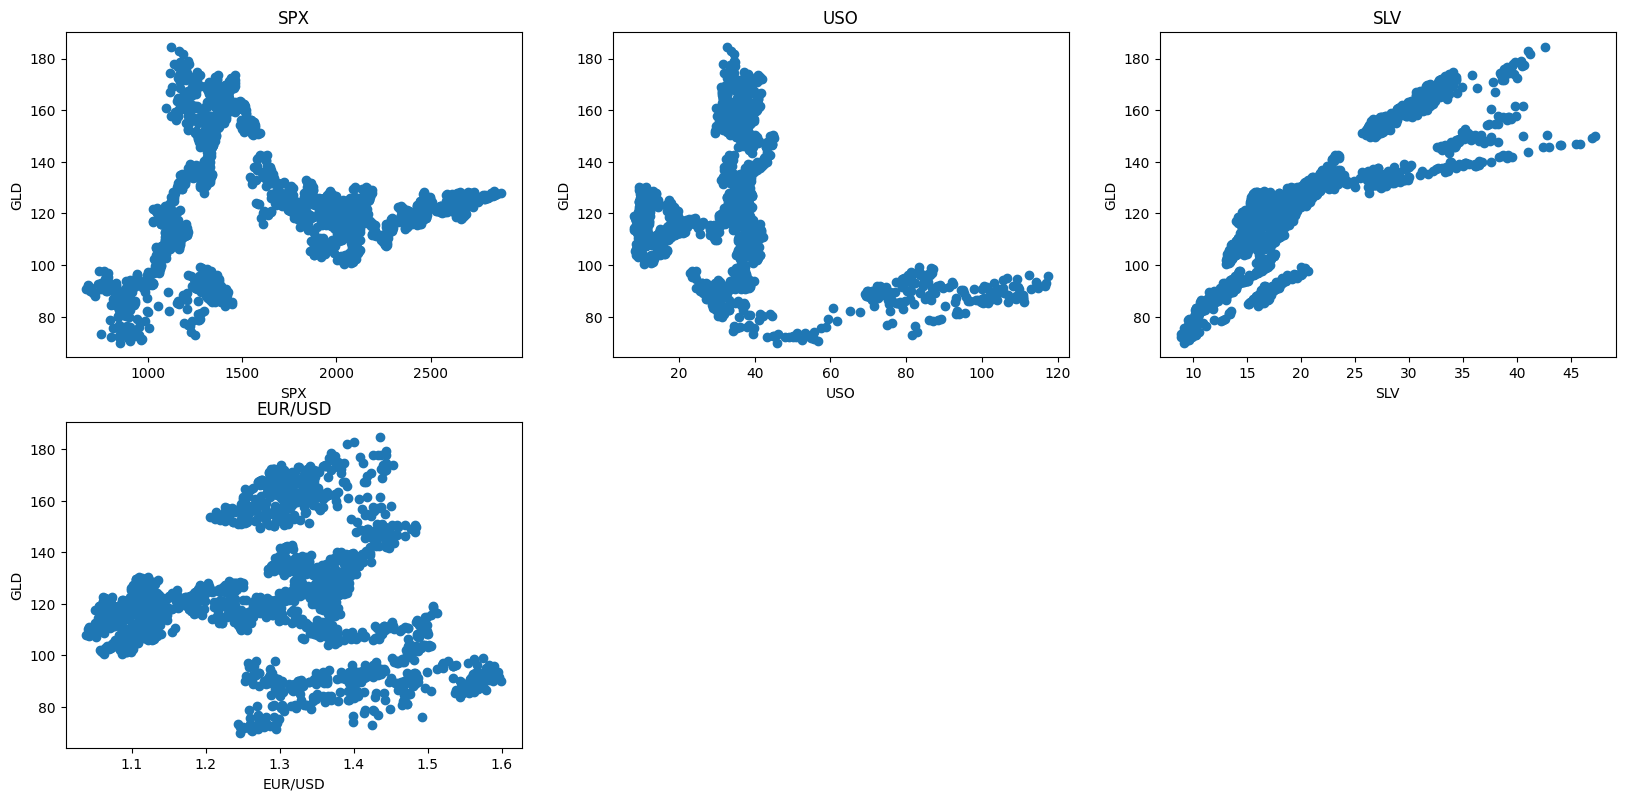

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

####Take-away
* SLV feature appears to be developing linearly with GLD.

###13. Finding outliers in numerical features

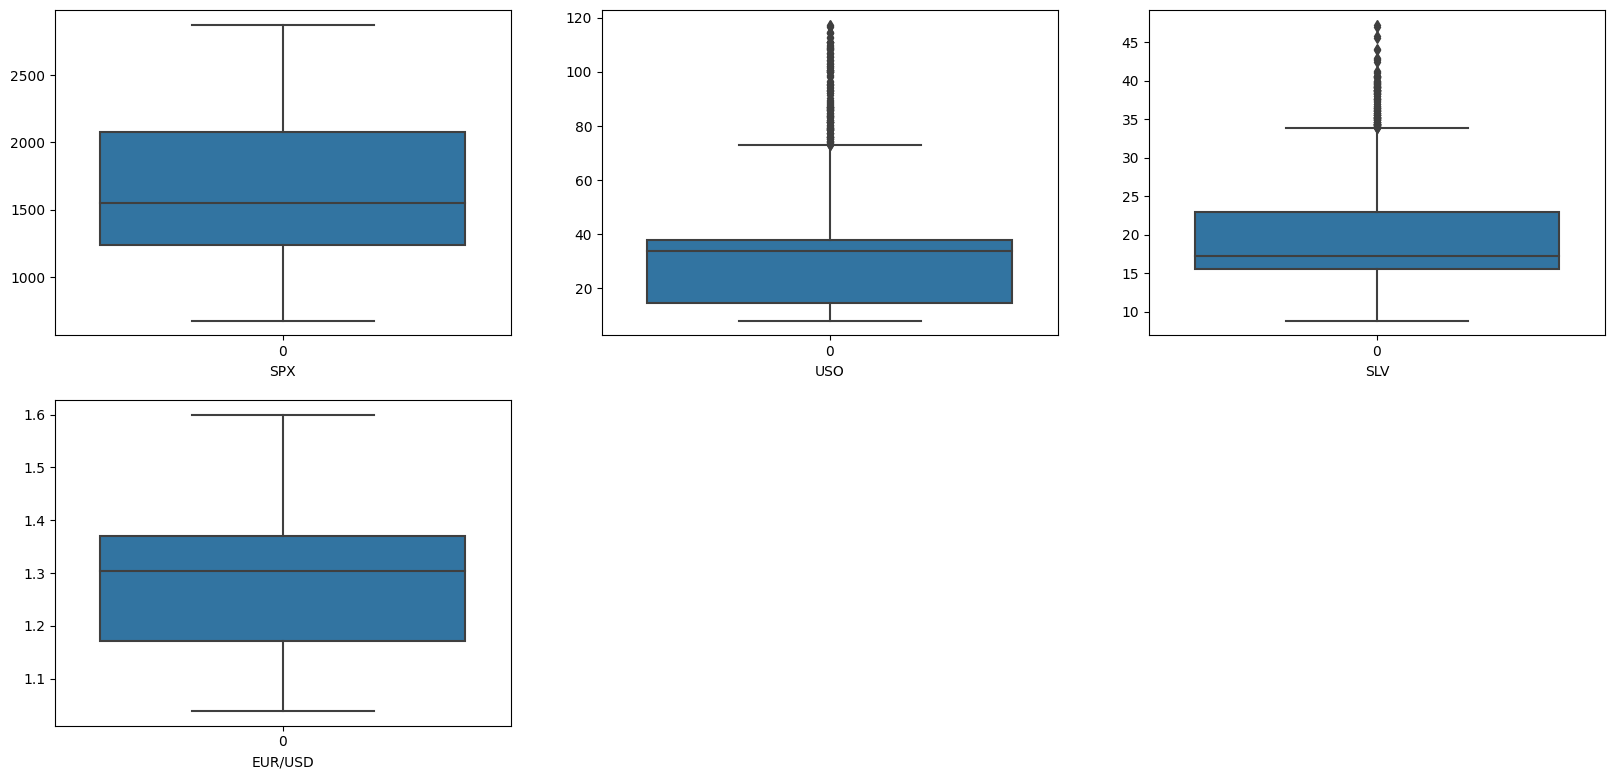

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

####Take-away
* USO and SLV has same outliers

###14. Exploring the correlation between numerical features

<ipython-input-19-36e8ca8502af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


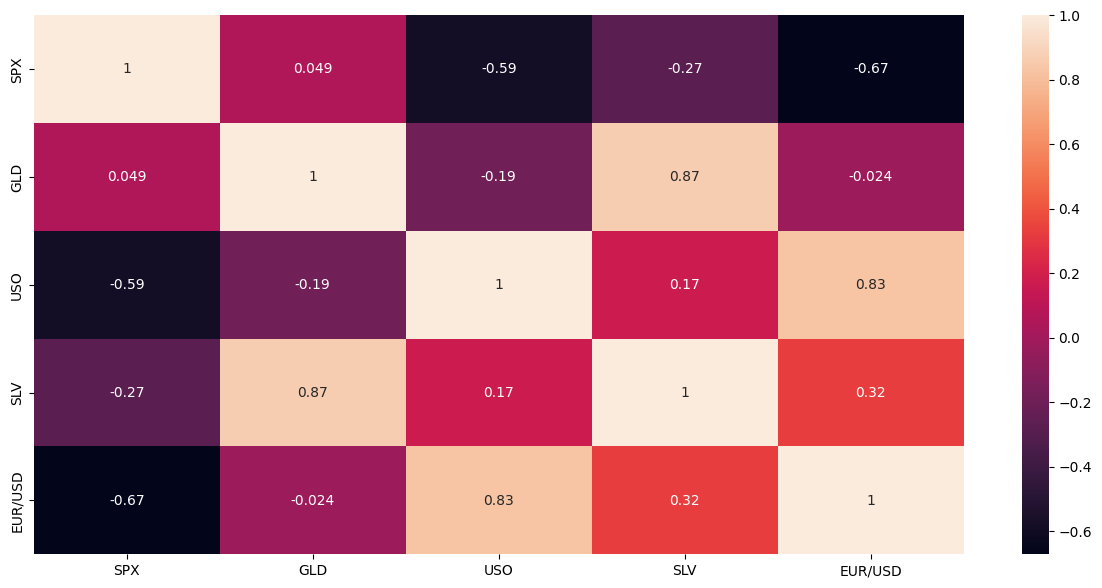

In [ ]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [ ]:
print (cor_mat['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



#### Take-away
* SLV feature is heavily correlated with GLD

#Feature Engineering

In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df2.drop(['Date'],axis=1, inplace=True)

In [ ]:
X = df2.drop(['GLD'],axis=1)
y = df2['GLD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
len(X_train)

1832

In [ ]:
len(X_test)

458

#Model Selection

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse', 'absolute_error' ,'poisson'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error' ,'poisson'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBRegressor':{
        'model':XGBRegressor(),
        'params':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [2, 3],
            'n_estimators': [10, 50, 100, 200]
        }
    }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

,model,best_score,best_params
0,decision_tree,0.982094,"{'criterion': 'poisson', 'splitter': 'best'}"
1,RandomForestRegressor,0.909093,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 130}"
2,XGBRegressor,0.984461,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


#### Take-away
* After applying model selection we see that XGBRegressor gives the best score
Therefore we will use XGBRegressor algorithm to build the model

#Model Building

In [ ]:
model_xgb = XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200)

In [ ]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
model_xgb.score(X_test,y_test)

0.9870715624264113

In [ ]:
Xscore = model_xgb.score(X_test,y_test)
print(Xscore)

0.9870715624264113


In [ ]:
y_pred1= model_xgb.predict(X_test)

In [ ]:
y_pred1

array([126.91255 , 116.07203 , 139.11777 , 122.361206,  92.43533 ,
       151.31879 , 117.935585, 112.93372 , 150.30223 , 105.18856 ,
       102.74204 , 120.355415,  91.68212 , 157.07991 , 122.33409 ,
       117.13599 ,  86.60144 ,  91.361725,  92.800125, 123.97655 ,
        82.792496, 117.59238 , 126.596535, 172.56363 , 170.49359 ,
       141.52974 , 114.865395, 160.5663  , 133.64827 , 116.97694 ,
       110.98748 , 105.72465 , 127.782   , 121.33449 ,  99.53079 ,
       120.045395,  85.4992  , 114.99996 , 126.15768 , 139.5755  ,
       109.40679 , 132.88535 , 106.04267 , 137.01904 , 137.5286  ,
       151.4722  , 119.51169 , 159.60515 , 152.9145  , 127.159   ,
       122.24207 , 116.51639 , 124.60742 , 116.747696, 153.9773  ,
       125.52504 , 111.52839 ,  86.34916 , 156.567   , 119.43974 ,
        88.68294 , 114.865395,  83.52192 , 146.3528  , 125.0956  ,
       126.32718 , 125.54302 , 120.34255 , 164.80779 , 122.36415 ,
       125.743164, 174.49646 , 123.07203 , 170.8931  , 119.127

In [ ]:
y_test

1255    128.789993
2100    115.620003
711     139.220001
1328    120.930000
53       93.040001
           ...    
2085    120.360001
1362    129.130005
828     159.869995
567     117.339996
1693    106.379997
Name: GLD, Length: 458, dtype: float64

In [ ]:
Y_test = list(y_test)

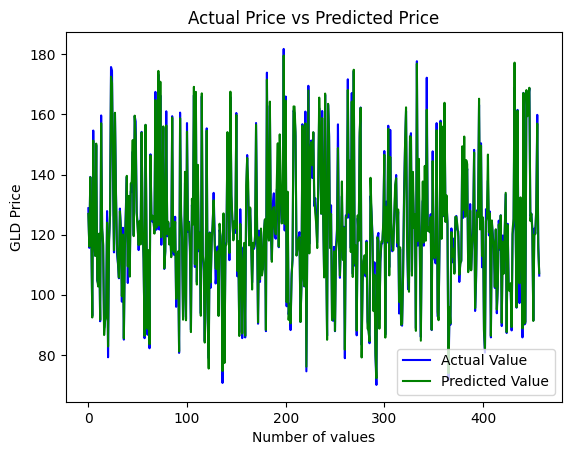

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred1, color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn import metrics

In [ ]:
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To calculate the mean squred error in predictions
def MSE_Value(test,predicted):
    mse = mean_squared_error(test, predicted)
    print("The mean squared error is {}.".format(mse))
    return mse

#To calculate the mean absolute error in predictions
def MAE_Value(test,predicted):
    mae = mean_absolute_error(test, predicted)
    print("The mean absolute error is {}.".format(mae))
    return mae

In [ ]:
MAE = MAE_Value(y_test,y_pred1)
MSE = MSE_Value(y_test,y_pred1)
RMSE=RMSE_Value(y_test,y_pred1)

The mean absolute error is 1.674718189840125.
The mean squared error is 6.651026619449279.
The root mean squared error is 2.5789584369371443.


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred1 = model_xgb.predict(X_test)[:,0]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

IndexError: ignored

In [ ]:
#define metrics
y_pred1 = model_xgb.predict(X_test)[::,0]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

IndexError: ignored

## **Decision Tree**

In [ ]:
model_DTR = DecisionTreeRegressor()

In [ ]:
model_DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
Dscore = model_DTR.score(X_test,y_test)
print(Dscore)

0.9813625258222748


In [ ]:
y_pred2= model_DTR.predict(X_test)

In [ ]:
y_pred2

array([127.550003, 116.470001, 140.339996, 120.260002,  93.459999,
       157.75    , 117.580002, 113.650002, 151.619995, 105.169998,
       102.839996, 117.099998,  93.129997, 161.600006, 122.129997,
       118.559998,  86.739998,  91.93    ,  93.529999, 125.489998,
        78.389999, 115.43    , 127.089996, 173.610001, 167.339996,
       138.210007, 113.639999, 159.070007, 135.229996, 113.580002,
       110.400002, 104.720001, 126.269997, 122.209999,  98.900002,
       120.949997,  85.459999, 115.279999, 128.229996, 140.339996,
       104.230003, 131.160004, 107.970001, 134.660004, 133.110001,
       148.910004, 119.730003, 157.580002, 160.490005, 127.849998,
       124.010002, 115.089996, 124.220001, 118.470001, 152.990005,
       121.449997, 113.830002,  87.470001, 155.139999, 119.790001,
        87.989998, 114.5     ,  84.279999, 146.869995, 126.220001,
       127.550003, 125.18    , 121.900002, 168.020004, 121.190002,
       125.379997, 173.589996, 122.290001, 173.490005, 121.   

In [ ]:
y_test

1255    128.789993
2100    115.620003
711     139.220001
1328    120.930000
53       93.040001
           ...    
2085    120.360001
1362    129.130005
828     159.869995
567     117.339996
1693    106.379997
Name: GLD, Length: 458, dtype: float64

In [ ]:
Y_test = list(y_test)

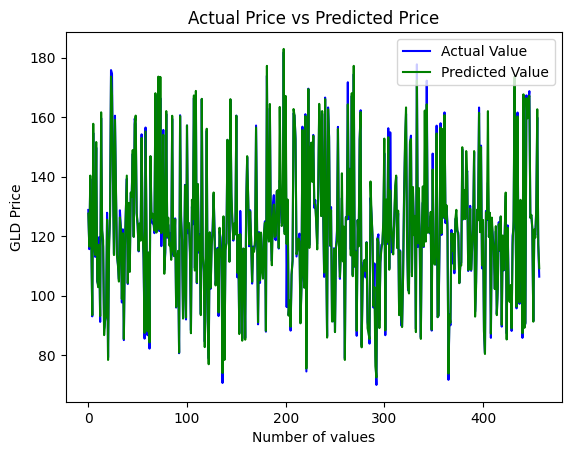

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred2, color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To calculate the mean squred error in predictions
def MSE_Value(test,predicted):
    mse = mean_squared_error(test, predicted)
    print("The mean squared error is {}.".format(mse))
    return mse

#To calculate the mean absolute error in predictions
def MAE_Value(test,predicted):
    mae = mean_absolute_error(test, predicted)
    print("The mean absolute error is {}.".format(mae))
    return mae

In [ ]:
MAE = MAE_Value(y_test,y_pred2)
MSE = MSE_Value(y_test,y_pred2)
RMSE=RMSE_Value(y_test,y_pred2)

The mean absolute error is 1.469279554585152.
The mean squared error is 9.588036927879097.
The root mean squared error is 3.0964555426937905.


# **Random Forest**

In [ ]:
model_RFR = RandomForestRegressor()

In [ ]:
model_RFR.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
Rscore = model_RFR.score(X_test,y_test)
print(Rscore)

0.9890819998882087


In [ ]:
y_pred3= model_RFR.predict(X_test)

In [ ]:
y_pred3

array([127.02719888, 116.77759959, 139.5952009 , 122.50159982,
        94.23150037, 154.85090141, 117.63640118, 113.23300136,
       153.36950045, 105.74060041, 103.15559927, 120.10640058,
        92.22379945, 159.22380039, 121.53279849, 117.32880079,
        86.8444983 ,  91.96909921,  93.04340019, 125.81189939,
        82.94219961, 117.7064989 , 126.54379791, 173.43539726,
       169.30659709, 139.78230213, 114.29439941, 160.01290202,
       133.62660073, 115.82070009, 110.85240115, 104.69130147,
       127.89420013, 122.23559983,  98.71239975, 120.28289927,
        83.75590012, 115.11240023, 127.39979919, 140.47859909,
       107.34870112, 131.84230048, 108.62489925, 135.17370084,
       133.43919953, 149.04089898, 119.71440051, 156.39930013,
       157.30700165, 127.62629989, 124.23399981, 115.14669854,
       124.08120076, 119.13580004, 153.80329999, 121.53299956,
       112.50140021,  86.78609909, 155.59580028, 118.22660104,
        88.13079887, 114.72190015,  83.07409925, 146.43

In [ ]:
Y_test = list(y_test)

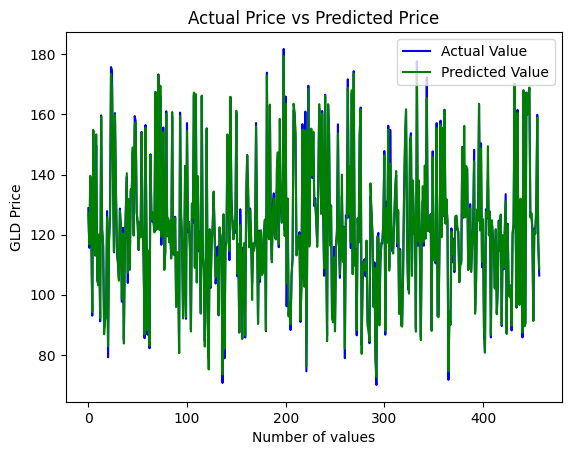

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred3, color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To calculate the mean squred error in predictions
def MSE_Value(test,predicted):
    mse = mean_squared_error(test, predicted)
    print("The mean squared error is {}.".format(mse))
    return mse

#To calculate the mean absolute error in predictions
def MAE_Value(test,predicted):
    mae = mean_absolute_error(test, predicted)
    print("The mean absolute error is {}.".format(mae))
    return mae

In [ ]:
MAE = MAE_Value(y_test,y_pred3)
MSE = MSE_Value(y_test,y_pred3)
RMSE=RMSE_Value(y_test,y_pred3)

The mean absolute error is 1.3194017595633167.
The mean squared error is 5.616758325307585.
The root mean squared error is 2.3699701106359097.


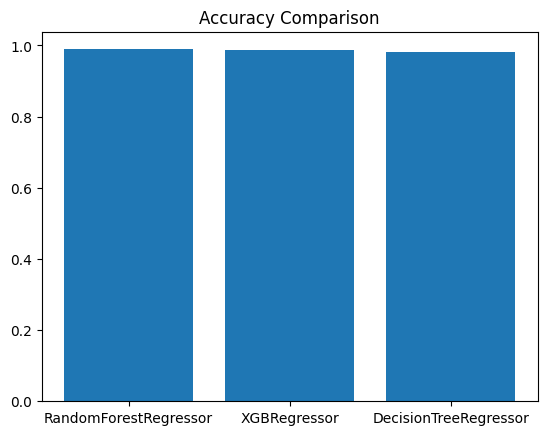

RandomForestRegressor =  0.9890819998882087 
XGBRegressor =  0.9870715624264113 
DecisionTreeRegressor =  0.9813625258222748


In [ ]:
plt.bar(['RandomForestRegressor', 'XGBRegressor','DecisionTreeRegressor' ],[ Rscore, Xscore, Dscore])
plt.title('Accuracy Comparison')
plt.show()
print('RandomForestRegressor = ', Rscore , '\nXGBRegressor = ', Xscore ,'\nDecisionTreeRegressor = ', Dscore)